In [1]:
import pandas as pd

In [3]:
df=pd.read_csv(r'F:\Lessons\Math\\london.csv', sep=',')

In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [5]:
df.set_index("timestamp", inplace=True)

<AxesSubplot:xlabel='timestamp'>

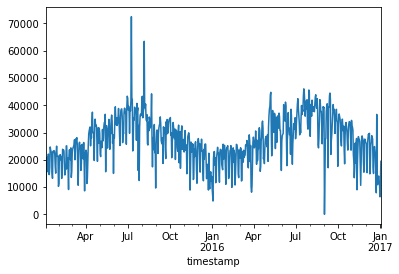

In [5]:
df.resample(rule="D").cnt.sum().plot() 

In [6]:
df_roll=df.resample('D').cnt.sum().rolling(3).mean().reset_index()

In [7]:
df_day=df.resample('D').cnt.sum().reset_index()

In [8]:
df_day.iloc['2015-07-09']

TypeError: Cannot index by location index with a non-integer key

In [9]:
tmp=df_roll['cnt']-df_day['cnt']
tmp

0              NaN
1              NaN
2     -3873.333333
3      -381.000000
4      3491.666667
          ...     
726    1116.000000
727     923.333333
728    3382.666667
729   -1933.666667
730   -6876.000000
Name: cnt, Length: 731, dtype: float64

In [10]:
import numpy as np

In [11]:
std=np.std(tmp)
std

4558.586641117938

In [12]:
lower_bound=df_roll.cnt - (2.576*std)
lower_bound

0              NaN
1              NaN
2      4996.747479
3      8940.080812
4      7349.747479
          ...     
726     939.080812
727     604.414146
728   -1939.252521
729   -1853.585854
730     817.080812
Name: cnt, Length: 731, dtype: float64

In [13]:
upper_bound=df_roll.cnt + (2.576*std)
upper_bound

0               NaN
1               NaN
2      28482.585854
3      32425.919188
4      30835.585854
           ...     
726    24424.919188
727    24090.252521
728    21546.585854
729    21632.252521
730    24302.919188
Name: cnt, Length: 731, dtype: float64

In [14]:
df_day['lower_bound']=lower_bound
df_day['upper_bound']=upper_bound


In [15]:
df_day

,timestamp,cnt,lower_bound,upper_bound
0,2015-01-04,9234,NaN,NaN
1,2015-01-05,20372,NaN,NaN
2,2015-01-06,20613,4996.747479,28482.585854
3,2015-01-07,21064,8940.080812,32425.919188
4,2015-01-08,15601,7349.747479,30835.585854
...,...,...,...,...
726,2016-12-30,11566,939.080812,24424.919188
727,2016-12-31,11424,604.414146,24090.252521
728,2017-01-01,6421,-1939.252521,21546.585854
729,2017-01-02,11823,-1853.585854,21632.252521


In [16]:
df_day.query("cnt>upper_bound")

,timestamp,cnt,lower_bound,upper_bound
186,2015-07-09,72504,38962.080812,62447.919188
214,2015-08-06,63468,34884.414146,58370.252521
609,2016-09-04,27512,2516.080812,26001.919188
721,2016-12-25,36653,7907.747479,31393.585854
